In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df_item = pd.read_csv("./data/olist_order_items_dataset.csv")
df_reviews = pd.read_csv("./data/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("./data/olist_orders_dataset.csv")
df_products = pd.read_csv("./data/olist_products_dataset.csv")
df_products_eng = pd.read_csv("./data/product_category_name_translation.csv")
df_geolocation = pd.read_csv("./data/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("./data/olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("./data/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("./data/olist_customers_dataset.csv")
df_category = pd.read_csv("./data/product_category_name_translation.csv")

## Top 3 Sellers


In [20]:
df_orders = pd.read_csv('./data/olist_orders_dataset.csv')
df_order_items = pd.read_csv('./data/olist_order_items_dataset.csv')
df_products = pd.read_csv('./data/olist_products_dataset.csv')
df_sellers = pd.read_csv('./data/olist_sellers_dataset.csv')

#Merge data
total_orders=pd.merge(df_orders, df_order_items)
product_orders=pd.merge(total_orders, df_products, on="product_id")
seller_products = pd.merge(product_orders, df_sellers, on="seller_id")


In [21]:
# Top 3 sellers & order count!

seller_products['seller_id'].value_counts()[:3]

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
Name: seller_id, dtype: int64

Text(0.5, 1.0, 'Top 3 Sellers')

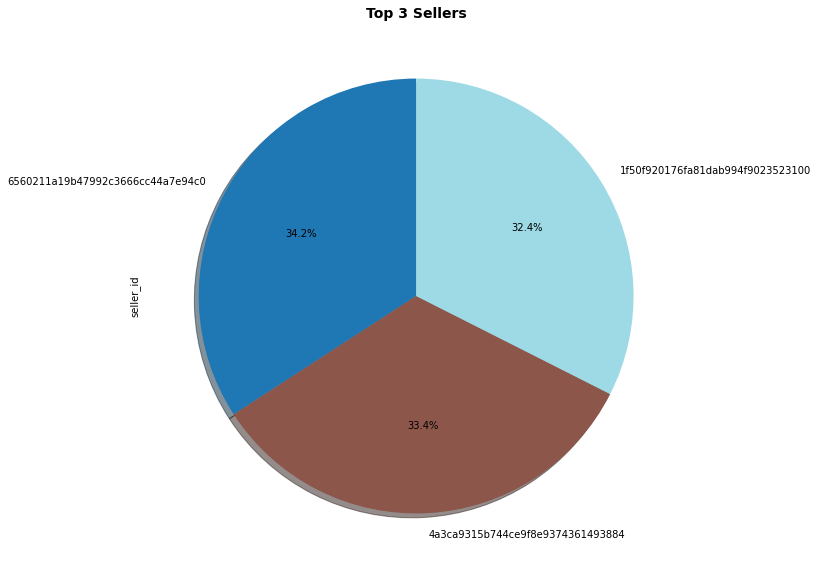

In [22]:
plt.figure(figsize=(20,10))

seller_products['seller_id'].value_counts()[:3].plot.pie(
    autopct='%1.1f%%', shadow=True, startangle=90, cmap='tab20')

plt.title("Top 3 Sellers",size=14, weight='bold')

#### Top 10 Seller's Top Category & Order Count

In [23]:
top_10 = seller_products['seller_id'].value_counts()[:3].keys()
seller_category= seller_products.groupby(['seller_id', 'product_category_name'])\
                        ['seller_id'].count().sort_values(ascending=False)


graph = {"seller_id": [], "category": [], "category_order_count":[]}
for elt in seller_category.items():
    if not elt[0][0] in top_10:
        continue
    
    cat_eng_name = df_products_eng[df_products_eng.product_category_name ==  elt[0][1]].product_category_name_english.item()
        
    graph["seller_id"].append(str(elt[0][0])[-5:])
    graph["category"].append(cat_eng_name)
    graph["category_order_count"].append(elt[1])
    

fig = px.sunburst(graph, path=['seller_id', 'category', 'category_order_count'])
fig.show(config=dict({'scrollZoom': True}))



<IPython.core.display.Javascript object>

In [24]:
top_10 = seller_products['seller_id'].value_counts()[:3].keys()
seller_category= seller_products.groupby(['seller_id', 'product_category_name'])\
                        ['seller_id'].count().sort_values(ascending=False)

graph = []
for elt in seller_category.items():
    if not elt[0][0] in top_10:
        continue
    
    cat_eng_name = df_products_eng[df_products_eng.product_category_name ==  elt[0][1]].product_category_name_english.item()
    graph.append([str(elt[0][0])[-5:], cat_eng_name, elt[1]])

graph


[['23100', 'garden_tools', 1882],
 ['e94c0', 'watches_gifts', 1628],
 ['93884', 'bed_bath_table', 1572],
 ['e94c0', 'fashion_bags_accessories', 340],
 ['93884', 'home_confort', 243],
 ['93884', 'furniture_decor', 85],
 ['93884', 'toys', 55],
 ['23100', 'baby', 42],
 ['e94c0', 'audio', 32],
 ['93884', 'home_comfort_2', 26],
 ['e94c0', 'perfumery', 13],
 ['e94c0', 'computers_accessories', 12],
 ['e94c0', 'sports_leisure', 7],
 ['23100', 'signaling_and_security', 7],
 ['93884', 'baby', 5],
 ['e94c0', 'construction_tools_safety', 1],
 ['93884', 'cool_stuff', 1]]

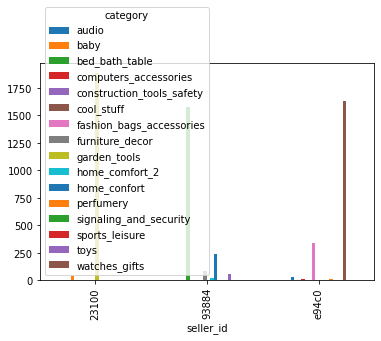

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(graph, columns=['seller_id','category','category_orders'])

df.pivot("seller_id", "category", "category_orders").plot(kind='bar')

plt.show()

In [26]:
seller_prodcut_reviews = pd.merge(seller_products, df_reviews)
seller_prodcut_reviews

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1,b00a32a0b42fd65efb58a5822009f629,...,15.0,9350,maua,SP,b8238c6515192f8129081e17dc57d169,5,NaN,"custo beneficio, simples de usar e rápido",2017-08-17 00:00:00,2017-08-21 12:43:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,1,31ec3a565e06de4bdf9d2a511b822b4d,...,28.0,13660,porto ferreira,SP,7f9849fcbfdf9fa3070c05b5501bf066,5,NaN,NaN,2018-07-10 00:00:00,2018-07-10 18:32:29
112368,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,1,241a1ffc9cf969b27de6e72301020268,...,11.0,89031,blumenau,SC,c950324a42c5796d06f569f77d8b2e88,1,NaN,NaN,2017-04-01 00:00:00,2017-04-01 10:24:03
112369,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,1,1d187e8e7a30417fda31e85679d96f0f,...,30.0,13478,americana,SP,19f21ead7ffe5b1b5147a7877c22bae5,5,NaN,NaN,2018-08-03 00:00:00,2018-08-04 11:22:40
112370,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,1,6e1c2008dea1929b9b6c27fa01381e90,...,41.0,8320,sao paulo,SP,ec2817e750153dfdd61894780dfc5d9e,4,NaN,NaN,2018-06-10 00:00:00,2018-06-13 09:17:47


In [27]:
seller_prodcut_reviews.groupby(['seller_id'])['review_score'].mean().filter(like='6560211a19b47992c3666cc44a7e94c0')

seller_id
6560211a19b47992c3666cc44a7e94c0    3.909406
Name: review_score, dtype: float64

In [28]:
# Top 10 Sellers
seller_products['seller_id'].value_counts()[:10].keys()

Index(['6560211a19b47992c3666cc44a7e94c0', '4a3ca9315b744ce9f8e9374361493884',
       '1f50f920176fa81dab994f9023523100', 'cc419e0650a3c5ba77189a1882b7556a',
       'da8622b14eb17ae2831f4ac5b9dab84a', '955fee9216a65b617aa5c0531780ce60',
       '1025f0e2d44d7041d6cf58b6550e0bfa', '7c67e1448b00f6e969d365cea6b010ab',
       'ea8482cd71df3c1969d7b9473ff13abc', '7a67c85e85bb2ce8582c35f2203ad736'],
      dtype='object')

In [29]:
top_10_sellers = seller_prodcut_reviews[seller_prodcut_reviews.seller_id.isin(seller_products['seller_id'].value_counts()[:10].keys() )]
top_10_sellers['total_items_price'] = top_10_sellers['order_item_id'] * top_10_sellers['price']
top_10_sellers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,total_items_price
979,bccbe20275c5ca847160e9ca42aa220d,b1a61930f7a035bc34f86f22eebed4ae,delivered,2018-05-15 20:36:18,2018-05-15 20:56:09,2018-05-16 15:51:00,2018-05-18 00:42:32,2018-05-30 00:00:00,2,dc52f0f5d3ec37a93eaf956cde4e5d2c,...,5849,sao paulo,SP,c7972e9a74b8dea24b59f1a28a5307a2,1,Não entregou produto,"Sem comentário , não recebi o relógio Cassio .",2018-05-19 00:00:00,2018-05-20 22:30:45,98.00
3047,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,1,9a78fb9862b10749a117f7fc3c31f051,...,8577,itaquaquecetuba,SP,abc5655186d40772bd6e410420e6a3ed,5,NaN,NaN,2017-08-17 00:00:00,2017-08-18 01:47:32,149.99
3048,e192b63496e874f9ec02a62d97ac23be,611086d2305e396ee944223283d20362,delivered,2018-03-03 08:59:18,2018-03-03 09:10:28,2018-03-15 18:31:35,2018-04-21 00:48:52,2018-04-12 00:00:00,1,9a78fb9862b10749a117f7fc3c31f051,...,8577,itaquaquecetuba,SP,e43589d9b1eb36907925a598bf511d52,1,NaN,Não responde as solicitações de atendimento.,2018-04-14 00:00:00,2018-04-14 13:12:47,159.99
3049,a65d018a7a1122b4312c742d7107e021,724eba516ed0739bd049fb295ce929c0,delivered,2018-05-28 08:28:44,2018-05-29 03:14:44,2018-06-12 14:04:00,2018-06-13 19:42:01,2018-07-03 00:00:00,1,9a78fb9862b10749a117f7fc3c31f051,...,8577,itaquaquecetuba,SP,bb9bcc396c40753cfa347ea5d118afee,3,Muito bom,"O produto chegou antes do prazo, porém veio be...",2018-06-14 00:00:00,2018-06-15 00:30:28,159.99
3050,e4de6d53ecff736bc68804b0b6e9f635,9f6618c17568ac301465fe7ad056c674,delivered,2017-10-16 14:56:50,2017-10-17 03:49:34,2017-10-27 22:14:21,2017-11-08 21:25:24,2017-11-21 00:00:00,1,90b58782fdd04cb829667fcc41fb65f5,...,8577,itaquaquecetuba,SP,92361590ccd1870c0d60072aac6a8df8,2,NaN,NaN,2017-11-09 00:00:00,2017-11-22 12:27:34,179.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53103,10a00d04ca3504e6a7804ccc87050e81,d82f810496bab97772be6026de6dc7ed,delivered,2018-06-30 16:02:53,2018-07-02 10:50:11,2018-07-03 11:10:00,2018-07-11 22:55:39,2018-07-23 00:00:00,1,eefc25bf3b54c979499864b77267ee2f,...,3426,sao paulo,SP,6b262ee04cdb199fe3e3002dd574fd1b,5,Indico a todos,"Bolsa de muita qualidade, tamanho perfeito. In...",2018-07-12 00:00:00,2018-07-13 11:13:04,229.99
53104,3645c66b5c03384bc97063c45b29acd7,00c042af846ab3125854b4abc3bf25a6,delivered,2017-09-18 22:08:50,2017-09-20 02:35:36,2017-09-20 19:47:35,2017-10-11 20:08:07,2017-10-05 00:00:00,1,b60aae43af64142e8dafff9888b64c85,...,3426,sao paulo,SP,90206ea85a90179a6f82d6e0761869c7,1,NaN,Olá queria informar que o produto não foi entr...,2017-10-11 00:00:00,2017-10-16 14:25:24,239.99
53105,c7a41978e3a504f1f6281e82e05c07f7,34eaceb9c054e70d3902b70fa7052c77,delivered,2017-03-03 11:18:53,2017-03-03 11:30:18,2017-03-03 12:45:30,2017-03-16 15:52:19,2017-03-28 00:00:00,1,aadd486ebe3c20e6e07fa2a40d557a00,...,3426,sao paulo,SP,ab0cb27d8ca0537a0752f4bf449bb81c,5,NaN,otimo produto com preço bom e entrega rapida r...,2017-03-18 00:00:00,2017-03-20 22:47:20,75.99
53106,6b78266e22c19ea2fd49f03f59ef7b47,2c7a3fd723b8a905d140f3da465d51fd,delivered,2018-05-01 21:59:37,2018-05-01 22:16:31,2018-05-02 13:25:00,2018-05-03 18:03:32,2018-05-16 00:00:00,1,165deaf73f29fe5f4e6c607b40d93d26,...,3426,sao paulo,SP,75aab0089effbda8b153cbfe31617f12,5,NaN,NaN,2018-05-04 00:00:00,2018-05-04 21:47:47,216.99


## Top 3 Sellers

In [30]:
df_sellers.filter(items=['seller_state', 'seller_id'])

,seller_state,seller_id
0,SP,3442f8959a84dea7ee197c632cb2df15
1,SP,d1b65fc7debc3361ea86b5f14c68d2e2
2,RJ,ce3ad9de960102d0677a81f5d0bb7b2d
3,SP,c0f3eea2e14555b6faeea3dd58c1b1c3
4,SP,51a04a8a6bdcb23deccc82b0b80742cf
...,...,...
3090,PR,98dddbc4601dd4443ca174359b237166
3091,SC,f8201cab383e484733266d1906e2fdfa
3092,SP,74871d19219c7d518d0090283e03c137
3093,RS,e603cf3fec55f8697c9059638d6c8eb5


In [31]:
sellers_graph = {"seller_id": [], 
                             "avg_review_score":[], 
                             "total_revenue":[], 
                             "total_orders":[],    
                             "seller_state": [],
                             "seller_city": [],
                             "top_product_category": [],
                            }

for seller_id in seller_products['seller_id'].value_counts()[:3].keys():
    sellers_graph['seller_id'].append(str(seller_id)[-6:])
    review_score = float(seller_prodcut_reviews.groupby(['seller_id'])['review_score'].mean().filter(like=seller_id))
    sellers_graph['avg_review_score'].append("{:.2f} stars".format(review_score))
    
    total_orders = float(seller_products['seller_id'].value_counts()[:10].filter(like=seller_id))
    sellers_graph['total_orders'].append(total_orders)
    
    revenue = int(top_10_sellers.groupby(['seller_id'])['total_items_price'].sum().filter(like=seller_id))
    sellers_graph['total_revenue'].append("$ {:.2f}".format(revenue))
    
    sellers_graph['seller_state'].append(df_sellers[df_sellers['seller_id'] == seller_id]['seller_state'].item())
    sellers_graph['seller_city'].append(df_sellers[df_sellers['seller_id'] == seller_id]['seller_city'].item())
    
    top_product_category = top_10_sellers[top_10_sellers['seller_id'] == seller_id]['product_category_name'].value_counts().keys()[0]
    sellers_graph['top_product_category'].append(df_products_eng[df_products_eng['product_category_name'] == top_product_category]['product_category_name_english'].item())


sellers_graph


{'seller_id': ['7e94c0', '493884', '523100'],
 'avg_review_score': ['3.91 stars', '3.80 stars', '3.98 stars'],
 'total_revenue': ['$ 132610.00', '$ 227526.00', '$ 162645.00'],
 'total_orders': [2033.0, 1987.0, 1931.0],
 'seller_state': ['SP', 'SP', 'SP'],
 'seller_city': ['sao paulo', 'ibitinga', 'sao jose do rio preto'],
 'top_product_category': ['watches_gifts', 'bed_bath_table', 'garden_tools']}

In [32]:
fig = px.sunburst(sellers_graph, 
                  values='total_orders', 
                  path=['seller_id', 'total_orders', 'total_revenue', 'avg_review_score'],
                  names=['111', '2222', '3333']
                 )
fig.show()


<IPython.core.display.Javascript object>